Dependencies Import


In [216]:
# this code will import all the libraries that we need for this model.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [217]:
# read the dataset that is holding the information for the credit card
# transactions.
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [218]:
# this will display the first 5 rows of the dataset.
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [219]:
# this will display the last 5 rows of the dataset.
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [220]:
# information about the dataset showcasing the datatypes used and whether the
#dataset contains null values or not.
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [221]:
# check for the number of missing values on each column.
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [222]:
# check the distribution between acceptable transaction and fraudulent transaction.
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Looking at the above values it shows that the dataset is very unstable and inbalanced.

0---> would represent acceptable transaction

1---> would the represent fradulent transaction.

In [223]:
# data seperation for analysis.
acceptable = credit_card_data[credit_card_data.Class == 0]
fraudulent = credit_card_data[credit_card_data.Class == 1]

In [224]:
print(acceptable.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [225]:
# statistical measures.
acceptable.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [226]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [227]:
# value comparison of both transactions.
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Data Sampling

In [228]:
# before sampling the dataset...
# calculate the percentage of both the acceptable and fraudulent transactions of
# the dataset.
classes=credit_card_data['Class'].value_counts()
acceptable_percent=classes[0]/credit_card_data['Class'].count()*100
fraudulent_percent=classes[1]/credit_card_data['Class'].count()*100
print(acceptable_percent)
print(fraudulent_percent)

99.82725143693798
0.1727485630620034


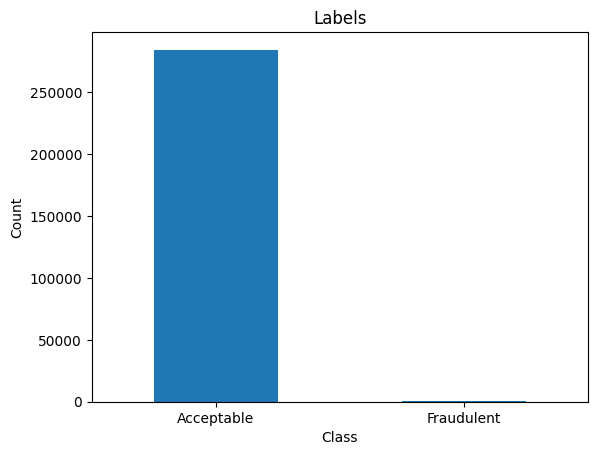

In [229]:
labels = ['Acceptable','Fraudulent']
count = credit_card_data.value_counts(credit_card_data['Class'])
count.plot(kind = "bar",rot=0)
plt.title("Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

create a sample dataset that contains a normal distribution of both transactions.

In [230]:
acceptable_sample=acceptable.sample(n=492)

Concatinate the sample dataset into the already existing fraudulent dataframe

In [231]:
# axis = 0 (rows)
# axis = 1 (columns)
new_dataset=pd.concat([acceptable_sample,fraudulent],axis=0)

In [232]:
# view the first 5 rows of the new dataset picked at random.
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146975,87996.0,-0.435548,0.257724,1.179007,-0.776188,0.338816,0.105833,0.209755,0.071596,0.891173,...,0.332536,1.322533,-0.162608,0.780358,-0.725801,-0.372747,0.211147,0.068239,15.15,0
53050,45788.0,-1.610641,-6.552555,-1.416612,0.062123,-2.996910,1.006566,0.651996,-0.203953,-0.975301,...,0.758892,-0.824045,-1.566208,-0.703420,-0.000128,-0.069813,-0.240301,0.281782,1617.58,0
168957,119456.0,2.270928,-1.441246,-0.732295,-1.672920,-1.297603,-0.319558,-1.337772,-0.058633,-1.296745,...,-0.121295,0.168660,0.187112,-0.505753,-0.241376,-0.166857,0.024172,-0.059079,14.20,0
282212,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,...,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0
184683,126342.0,1.953431,-0.577309,-0.589700,0.167162,-0.568959,-0.109400,-0.717197,0.187935,1.026940,...,0.141432,0.414337,0.227603,0.776310,-0.369308,0.577768,-0.061906,-0.055524,20.00,0


In [233]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [234]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [235]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93543.254065,0.030209,0.000044,-0.031827,-0.015771,-0.057053,0.155020,0.032753,-0.062053,0.042559,...,-0.062968,-0.010956,-0.058395,-0.001396,-0.011666,0.027191,-0.043692,0.014632,-0.010775,95.449553
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting dataset into training and testind sets. (80%, 10%)

In [236]:
# x represent the features(content of the dataset) and y represent the class.
x = new_dataset.drop(columns = 'Class',axis = 1)
y = new_dataset['Class']

In [237]:
# this prints the data except the class column.
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
146975   87996.0 -0.435548  0.257724  1.179007 -0.776188  0.338816  0.105833   
53050    45788.0 -1.610641 -6.552555 -1.416612  0.062123 -2.996910  1.006566   
168957  119456.0  2.270928 -1.441246 -0.732295 -1.672920 -1.297603 -0.319558   
282212  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
184683  126342.0  1.953431 -0.577309 -0.589700  0.167162 -0.568959 -0.109400   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [238]:
# prints the classes.
print(y)

146975    0
53050     0
168957    0
282212    0
184683    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Splitting dataset into training and testind sets. (80%, 20%)

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [240]:
# original data, the training data, test data split.
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


Training the Model.

Logistics Regression Model

In [241]:
model = LogisticRegression()

In [242]:
# train the logistics regression model using the training data.
model.fit(x_train, y_train)

LogisticRegression()

In [243]:
# check the accuracy of the training data.
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [244]:
# if the accuracy is above 80% then it means the model is good
print('Accuracy on the Training data : ', training_data_accuracy * 100)

Accuracy on the Training data :  94.66327827191868


In [245]:
# accuracy on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [246]:
print('Accuracy on the Test data : ', test_data_accuracy * 100)

Accuracy on the Test data :  92.89340101522842


In [247]:
import pickle
pickle.dump(model,open('model.pkl','wb'))